Ensure that the hypercolumn feature is working reasonably.

In [1]:
%matplotlib notebook
import os
if not os.getcwd().endswith("masters"):
    os.chdir("..")

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.group_classes import determine_genres
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict
from sklearn.metrics import accuracy_score
import bnpy

In [7]:
classes = determine_genres()
track_classes = []
hypercol_feat = []

with h5py.File('out/homburg.h5', 'r') as f:
    tracks = f.keys()
    for track in tracks:
        hypercol_feat.append(f[track]['cnn.hypercolumn'].value)
        track_classes.append(classes[track])

track_classes = np.asarray(track_classes)
hypercol_feat = np.asarray(hypercol_feat)
hypercol_feat.shape

(1886, 4, 32)

<IPython.core.display.Javascript object>


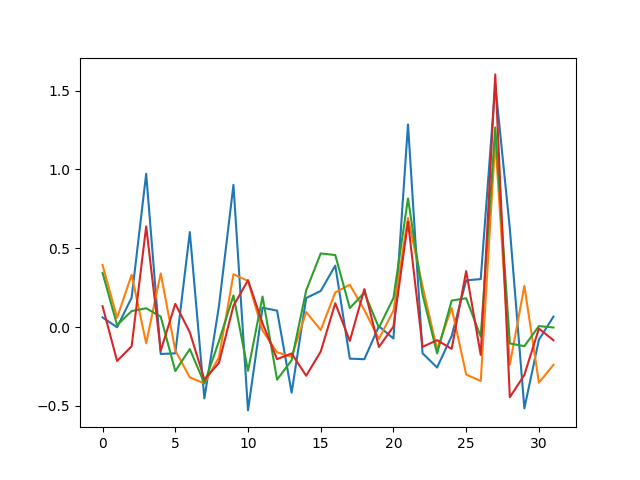

In [3]:
fig, axes = plt.subplots()
axes.plot(hypercol_feat[0].T)

In [8]:
feat = np.asarray([x.max(axis=0) for x in hypercol_feat])
print(feat.shape)

results = []
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for train_indices, test_indices in kf.split(feat, track_classes):
    X_train = feat[train_indices]
    X_test = feat[test_indices]
    y_train = track_classes[train_indices]
    y_true = track_classes[test_indices]

    clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    results.append(accuracy_score(y_true, y_hat))

results = np.asarray(results)
(np.mean(results), np.std(results))

(1886, 32)


(0.51755346996041462, 0.020203064309277249)